# Portfolio Allocation and Sharp Ratio 2.0

# IMPORT PACKAGES

In [31]:
import pandas as pd
import quandl 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import *
import pandas_datareader.data as wb

# INPUT SECURITIES TO LOOKUP

In [4]:
# . . . . . . . . . . DEFINE 5 SECURITIES TO LOOKUP . . . . . . . . . .
s1=input('Enter Ticker 1: ')
s2=input('Enter Ticker 2: ')
s3=input('Enter Ticker 3: ')
s4=input('Enter Ticker 4: ')

# . . . . . . . . . . ASSIGN ASSETS TO LONG STRING 'STOCKS' . . . . . . . . . .
stocks=(s1+'_'+s2+'_'+s3+'_'+s4)

Enter Ticker 1: TSLA
Enter Ticker 2: AMZN
Enter Ticker 3: AAPL
Enter Ticker 4: AMD


# SECURITY LOOKUP & SAVE TO CSV

In [5]:
# . . . . . . . . . . DATA PULL PERAMETERS . . . . . . . . . .
start = datetime(2015,1,31)
end = datetime.now()
date_span=('From: '+str(start)+' - To: '+str(end))

# . . . . . . . . . . YAHOO FINANCE WEB DATA PULL . . . . . . . . . .
s1_data=wb.DataReader(s1,'yahoo', start, end)
s2_data=wb.DataReader(s2,'yahoo', start, end)
s3_data=wb.DataReader(s3,'yahoo', start, end)
s4_data=wb.DataReader(s4,'yahoo', start, end)
s_data = wb.DataReader([s1, s2, s3, s4], 'yahoo', start, end)


data_price_1 = s1_data['Adj Close'].values
data_np_1 = s1_data.values

data_price_2 = s2_data['Adj Close'].values
data_np_2 = s2_data.values

data_price_3 = s3_data['Adj Close'].values
data_np_3 = s3_data.values

data_price_4 = s4_data['Adj Close'].values
data_np_4 = s4_data.values

data_price_4 = s_data['Adj Close'].values
data_np_4 = s_data.values

# . . . . . . . . . . SAVE BULK FILE TO CSV . . . . . . . . . .
s_data.to_csv(r'C:\Users\gordo\Programming\Data_Bank\New_bank\Portfolio_Allocation_Sharpe\s_data_'+stocks+'.csv')

In [6]:
# You can also read from the csv file uploaded. Please do uncomment the execute it.
# aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
# cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
# ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
# amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

# NOMINALIZED RETURN

# ITERATE THROUGH DATA TO PRODUCE NOMINALIZED RETURN IN DF's


In [7]:
for df_stock in (s1_data, s2_data, s3_data, s4_data):
    df_stock['Normalize Return'] = df_stock['Adj Close']/df_stock.iloc[0]['Adj Close']
print(s1)
s1_data

TSLA


,High,Low,Open,Close,Volume,Adj Close,Normalize Return
Date,,,,,,,
2015-02-02,211.949997,203.300003,203.970001,210.940002,4149200,210.940002,1.000000
2015-02-03,220.369995,211.270004,213.220001,218.360001,4826200,218.360001,1.035176
2015-02-04,221.479996,216.800003,218.289993,218.550003,3305400,218.550003,1.036077
2015-02-05,225.479996,219.639999,219.880005,220.990005,3522900,220.990005,1.047644
2015-02-06,223.399994,216.500000,222.000000,217.360001,3243900,217.360001,1.030435
...,...,...,...,...,...,...,...
2020-02-03,786.140015,673.520020,673.690002,780.000000,47233500,780.000000,3.697734
2020-02-04,968.989990,833.880005,882.960022,887.059998,60938800,887.059998,4.205272
2020-02-05,845.979980,704.109985,823.260010,734.700012,48423800,734.700012,3.482981


In [8]:
for df_stock in (s1_data, s2_data, s3_data, s4_data):
    df_stock['Normalize Return'] = df_stock['Adj Close']/df_stock.iloc[1]['Adj Close']
#print(s2)
#s2_data

In [9]:
for df_stock in (s1_data, s2_data, s3_data, s4_data):
    df_stock['Normalize Return'] = df_stock['Adj Close']/df_stock.iloc[2]['Adj Close']
#print(s3)
#s3_data

In [10]:
for df_stock in (s1_data, s2_data, s3_data, s4_data):
    df_stock['Normalize Return'] = df_stock['Adj Close']/df_stock.iloc[3]['Adj Close']
#print(s4)
#s4_data

# ALLOCATION

Let's consider we have the following allocations for our total portfolio:

30% in Apple

20% in Google/Alphabet

40% in Amazon

10% in IBM


Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [11]:
# INPUT ALLOCATIONS PER ASSET

s1_allocate=input('Enter Allocation In Decimal Format - (0.3) : ')
s1_a=float(s1_allocate)

s2_allocate=input('Enter Allocation In Decimal Format - (0.3) : ')
s2_a=float(s2_allocate)

s3_allocate=input('Enter Allocation In Decimal Format - (0.3) : ')
s3_a=float(s3_allocate)

s4_allocate=input('Enter Allocation In Decimal Format - (0.3) : ')
s4_a=float(s4_allocate)

Enter Allocation In Decimal Format - (0.3) : .2
Enter Allocation In Decimal Format - (0.3) : .3
Enter Allocation In Decimal Format - (0.3) : .1
Enter Allocation In Decimal Format - (0.3) : .4


In [12]:
for df_stock,allocation in zip([s1_data, s2_data, s3_data, s4_data],[s1_a,s2_a,s3_a,s4_a]):
    df_stock['Allocation'] = df_stock['Normalize Return']*allocation

In [14]:
print(s1)
s1_data

TSLA


,High,Low,Open,Close,Volume,Adj Close,Normalize Return,Allocation
Date,,,,,,,,
2015-02-02,211.949997,203.300003,203.970001,210.940002,4149200,210.940002,0.954523,0.190905
2015-02-03,220.369995,211.270004,213.220001,218.360001,4826200,218.360001,0.988099,0.197620
2015-02-04,221.479996,216.800003,218.289993,218.550003,3305400,218.550003,0.988959,0.197792
2015-02-05,225.479996,219.639999,219.880005,220.990005,3522900,220.990005,1.000000,0.200000
2015-02-06,223.399994,216.500000,222.000000,217.360001,3243900,217.360001,0.983574,0.196715
...,...,...,...,...,...,...,...,...
2020-02-03,786.140015,673.520020,673.690002,780.000000,47233500,780.000000,3.529571,0.705914
2020-02-04,968.989990,833.880005,882.960022,887.059998,60938800,887.059998,4.014028,0.802806
2020-02-05,845.979980,704.109985,823.260010,734.700012,48423800,734.700012,3.324585,0.664917


In [15]:
#print(s2)
#s2_data

In [16]:
#print(s3)
#s3_data

In [17]:
#print(s4)
#s4_data

# INVESTMENT

Suppose we have invested one hundred thousand dollar $10,000 in all these portfolio

In [19]:
# INPUT INVESTMENT ALLOCATIONS PER ASSET $$$

s1_investment=input('Enter '+s1+' Allocation: ')
s1_i=int(s1_investment)

s2_investment=input('Enter '+s1+' Allocation: ')
s2_i=int(s2_investment)

s3_investment=input('Enter '+s1+' Allocation: ')
s3_i=int(s3_investment)

s4_investment=input('Enter '+s1+' Allocation: ')
s4_i=int(s4_investment)


Enter TSLA Allocation: 5000
Enter TSLA Allocation: 6000
Enter TSLA Allocation: 8000
Enter TSLA Allocation: 6000


In [20]:
for df_stock in [s1_data, s2_data, s3_data, s4_data]:
    df_stock['Position Values'] = df_stock['Allocation']*10000

In [21]:
print(s1)
s1_data

TSLA


,High,Low,Open,Close,Volume,Adj Close,Normalize Return,Allocation,Position Values
Date,,,,,,,,,
2015-02-02,211.949997,203.300003,203.970001,210.940002,4149200,210.940002,0.954523,0.190905,1909.045633
2015-02-03,220.369995,211.270004,213.220001,218.360001,4826200,218.360001,0.988099,0.197620,1976.197974
2015-02-04,221.479996,216.800003,218.289993,218.550003,3305400,218.550003,0.988959,0.197792,1977.917531
2015-02-05,225.479996,219.639999,219.880005,220.990005,3522900,220.990005,1.000000,0.200000,2000.000000
2015-02-06,223.399994,216.500000,222.000000,217.360001,3243900,217.360001,0.983574,0.196715,1967.147791
...,...,...,...,...,...,...,...,...,...
2020-02-03,786.140015,673.520020,673.690002,780.000000,47233500,780.000000,3.529571,0.705914,7059.142772
2020-02-04,968.989990,833.880005,882.960022,887.059998,60938800,887.059998,4.014028,0.802806,8028.055346
2020-02-05,845.979980,704.109985,823.260010,734.700012,48423800,734.700012,3.324585,0.664917,6649.169591


In [22]:
print(s2)
s2_data

AMZN


,High,Low,Open,Close,Volume,Adj Close,Normalize Return,Allocation,Position Values
Date,,,,,,,,,
2015-02-02,365.000000,350.010010,350.049988,364.470001,10231900,364.470001,0.974805,0.292442,2924.416167
2015-02-03,367.820007,360.209991,360.290009,363.549988,6212600,363.549988,0.972345,0.291703,2917.034210
2015-02-04,367.500000,358.230011,358.380005,364.750000,4169900,364.750000,0.975554,0.292666,2926.662808
2015-02-05,378.799988,365.899994,366.000000,373.890015,7247600,373.890015,1.000000,0.300000,3000.000000
2015-02-06,375.989990,371.010010,374.869995,374.279999,3892400,374.279999,1.001043,0.300313,3003.129135
...,...,...,...,...,...,...,...,...,...
2020-02-03,2048.500000,2000.250000,2010.599976,2004.199951,5899100,2004.199951,5.360400,1.608120,16081.199331
2020-02-04,2059.800049,2015.369995,2029.880005,2049.669922,5289300,2049.669922,5.482013,1.644604,16446.039008
2020-02-05,2071.020020,2032.000000,2071.020020,2039.869995,4376200,2039.869995,5.455802,1.636741,16367.406846


In [23]:
print(s3)
s3_data

AAPL


,High,Low,Open,Close,Volume,Adj Close,Normalize Return,Allocation,Position Values
Date,,,,,,,,,
2015-02-02,119.169998,116.080002,118.050003,118.629997,62739100.0,108.741241,0.985190,0.098519,985.190007
2015-02-03,119.089996,117.610001,118.500000,118.650002,51915700.0,108.759560,0.985356,0.098536,985.355969
2015-02-04,120.510002,118.309998,118.500000,119.559998,70149700.0,109.593704,0.992913,0.099291,992.913275
2015-02-05,120.230003,119.250000,120.019997,119.940002,42246200.0,110.375908,1.000000,0.100000,1000.000000
2015-02-06,120.250000,118.449997,120.019997,118.930000,43706600.0,109.446465,0.991579,0.099158,991.579291
...,...,...,...,...,...,...,...,...,...
2020-02-03,313.489990,302.220001,304.299988,308.660004,43496400.0,307.929199,2.789823,0.278982,2789.822572
2020-02-04,319.640015,313.630005,315.309998,318.850006,34154100.0,318.095062,2.881925,0.288192,2881.924763
2020-02-05,324.760010,318.950012,323.519989,321.450012,29706700.0,320.688934,2.905425,0.290543,2905.425110


In [24]:
print(s4)
s4_data

AMD


,High,Low,Open,Close,Volume,Adj Close,Normalize Return,Allocation,Position Values
Date,,,,,,,,,
2015-02-02,2.750000,2.650000,2.690000,2.670000,25688700,2.670000,0.806647,0.322659,3226.586251
2015-02-03,2.800000,2.680000,2.700000,2.760000,22592300,2.760000,0.833837,0.333535,3335.347478
2015-02-04,2.920000,2.760000,2.780000,2.850000,34829300,2.850000,0.861027,0.344411,3444.108706
2015-02-05,3.370000,2.870000,2.880000,3.310000,73355600,3.310000,1.000000,0.400000,4000.000000
2015-02-06,3.210000,3.000000,3.200000,3.030000,38300000,3.030000,0.915408,0.366163,3661.631449
...,...,...,...,...,...,...,...,...,...
2020-02-03,48.099998,46.230000,46.400002,48.020000,47077000,48.020000,14.507553,5.803021,58030.213037
2020-02-04,49.750000,48.610001,49.209999,49.450001,46302100,49.450001,14.939578,5.975831,59758.310112
2020-02-05,50.419998,49.310001,50.290001,49.840000,42737100,49.840000,15.057402,6.022961,60229.608476


In [26]:
portfolio_val = pd.concat([s1_data['Position Values'], s2_data['Position Values'], s3_data['Position Values'], s4_data['Position Values']],axis=1)

In [27]:
portfolio_val.columns = [s1,s2,s3,s4]
portfolio_val

,TSLA,AMZN,AAPL,AMD
Date,,,,
2015-02-02,1909.045633,2924.416167,985.190007,3226.586251
2015-02-03,1976.197974,2917.034210,985.355969,3335.347478
2015-02-04,1977.917531,2926.662808,992.913275,3444.108706
2015-02-05,2000.000000,3000.000000,1000.000000,4000.000000
2015-02-06,1967.147791,3003.129135,991.579291,3661.631449
...,...,...,...,...
2020-02-03,7059.142772,16081.199331,2789.822572,58030.213037
2020-02-04,8028.055346,16446.039008,2881.924763,59758.310112
2020-02-05,6649.169591,16367.406846,2905.425110,60229.608476


In [28]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val

,TSLA,AMZN,AAPL,AMD,Total Pos
Date,,,,,
2015-02-02,1909.045633,2924.416167,985.190007,3226.586251,9045.238058
2015-02-03,1976.197974,2917.034210,985.355969,3335.347478,9213.935631
2015-02-04,1977.917531,2926.662808,992.913275,3444.108706,9341.602320
2015-02-05,2000.000000,3000.000000,1000.000000,4000.000000,10000.000000
2015-02-06,1967.147791,3003.129135,991.579291,3661.631449,9623.487667
...,...,...,...,...,...
2020-02-03,7059.142772,16081.199331,2789.822572,58030.213037,83960.377712
2020-02-04,8028.055346,16446.039008,2881.924763,59758.310112,87114.329230
2020-02-05,6649.169591,16367.406846,2905.425110,60229.608476,86151.610023


Text(0.5, 1.0, 'Total Portfolio Value')

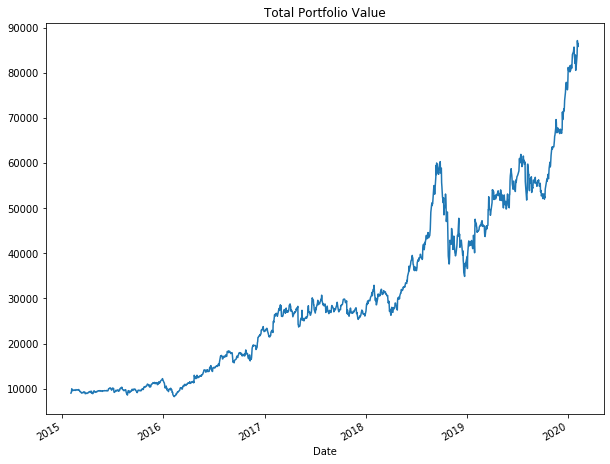

In [29]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

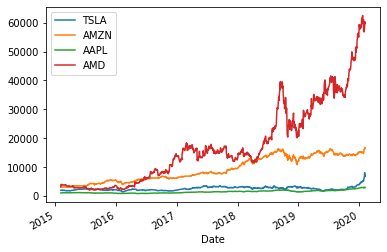

In [30]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')